In [1]:
import json


kaggle_credentials = {
    "username": "Teshiniii",
    "key": "0e4de6becd2e7a91773fd195c8878f3a"
}


with open("kaggle.json", "w") as json_file:
    json.dump(kaggle_credentials, json_file, indent=4)

print("kaggle.json file created successfully.")

import os
import zipfile


os.makedirs('/root/.kaggle', exist_ok=True)


!mv kaggle.json /root/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json


!pip install kaggle
!kaggle datasets download -d wasiqaliyasir/breast-cancer-dataset -p /content/data --unzip
print("Dataset downloaded and unzipped successfully.")

kaggle.json file created successfully.
Dataset URL: https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset
License(s): apache-2.0
  0% 0.00/48.7k [00:00<?, ?B/s]
100% 48.7k/48.7k [00:00<00:00, 224MB/s]
Dataset downloaded and unzipped successfully.


Original CSV entries: 569
Encoded DataFrame shape: (569, 34)
Sample encoded columns: ['diagnosis_B', 'diagnosis_M']


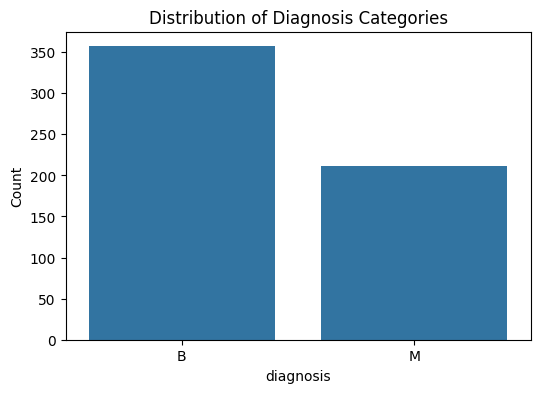

Interpretation: Slight imbalance (more benign cases) highlights need for encoding to maintain class representation in modeling.


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_dir = "/content/data"
os.makedirs(data_dir, exist_ok=True)
labels_df = pd.read_csv(f"{data_dir}/Breast_cancer_dataset.csv")
print(f"Original CSV entries: {len(labels_df)}")

labels_df_encoded = pd.get_dummies(labels_df, columns=['diagnosis'], prefix='diagnosis')
print("Encoded DataFrame shape:", labels_df_encoded.shape)
print("Sample encoded columns:", [col for col in labels_df_encoded.columns if 'diagnosis' in col])


diagnosis_counts = labels_df['diagnosis'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.title('Distribution of Diagnosis Categories')
plt.ylabel('Count')
plt.show()
print('Interpretation: Slight imbalance (more benign cases) highlights need for encoding to maintain class representation in modeling.')